<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Dealing-with-Missing-Data" data-toc-modified-id="Dealing-with-Missing-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dealing with Missing Data</a></span></li><li><span><a href="#Distribution-and-Skewness" data-toc-modified-id="Distribution-and-Skewness-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution and Skewness</a></span></li><li><span><a href="#Save-the-Dataset" data-toc-modified-id="Save-the-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save the Dataset</a></span></li></ul></div>

### Summary

Alot of existing EDA has been done for this kernel. The purpose of picking up this project was to better understand how build and validate models when dealing with regression-like problems.

Below is a brief summary of the EDA, and in the following notebook we move onto feature engineering and modelling.

In [16]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 500)

In [17]:
data_path = "../data"
file = "train"

df = pd.read_csv("{}/{}.csv".format(data_path, file))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
df.FullBath.unique()

array([2, 1, 3, 0])

In [19]:
df.shape

(1460, 81)

In [20]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

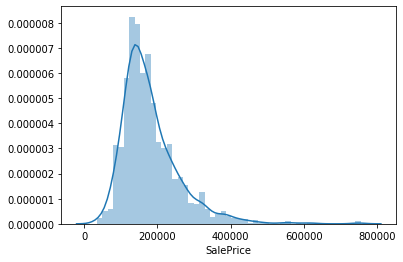

In [21]:
sns.distplot(df['SalePrice']);

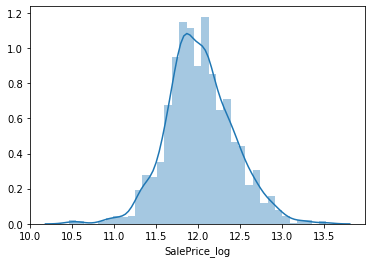

In [22]:
df["SalePrice_log"] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice_log']);

In [9]:
df.dtypes.value_counts()

object     43
int64      35
float64     4
dtype: int64

In [10]:
df.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 
               'MoSold', 'YrSold']] = df.loc[:,[
    'MSSubClass', 'OverallQual', 
    'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [11]:
df.dtypes.value_counts()

object     48
int64      30
float64     4
dtype: int64

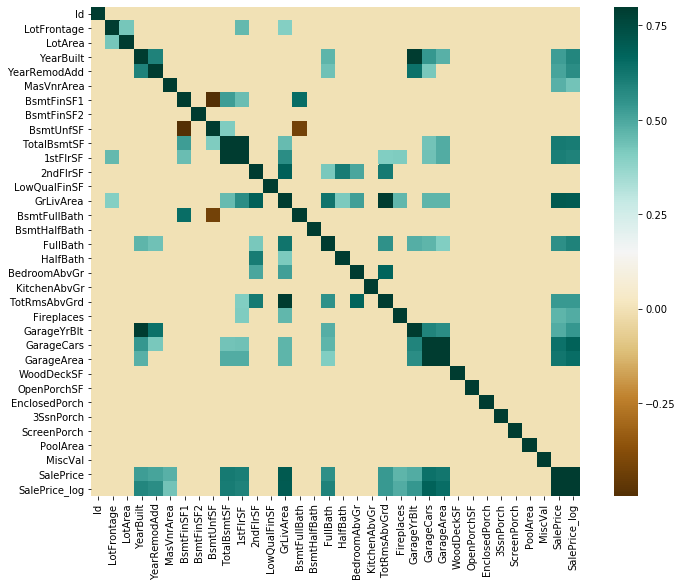

In [12]:
def display_threshold(x, threshold=0.4):
    if abs(x) >= threshold:
        return x
    else:
        return 0

corrmat = df.corr().applymap(lambda x: display_threshold(x, 0.4))

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="BrBG");

In [13]:
# This is such a nice hack. 
k = 10
corrmat.nlargest(k, 'SalePrice_log')['SalePrice_log']

SalePrice_log    1.000000
SalePrice        0.948374
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
Name: SalePrice_log, dtype: float64

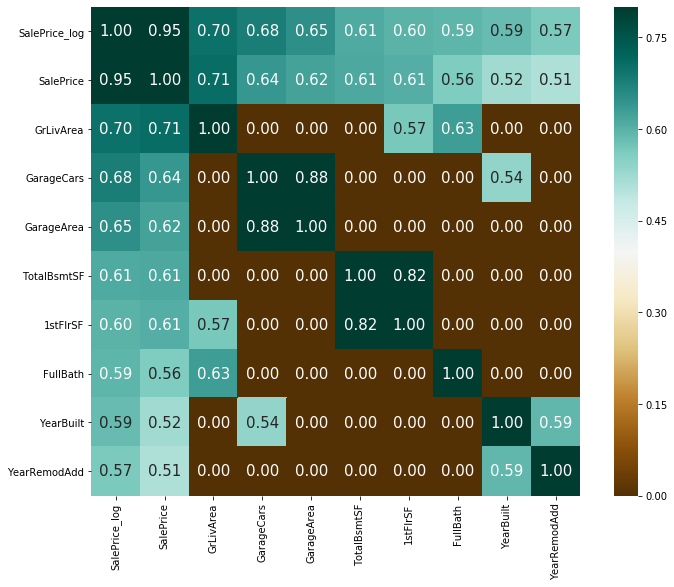

In [14]:
# For large correlation matrices, I think to zero out 
# smaller correlations to better visualise the strongest
# correlations on the heatmap

threshold = lambda x: x if (abs(x) > 0.5) else 0
threshold_vectorize = np.vectorize(threshold)

cols = corrmat.nlargest(k, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df[cols].values.T)
cm = threshold_vectorize(cm)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, vmax=.8, square=True, cmap="BrBG",
            cbar=True, annot=True, fmt='.2f', annot_kws={'size': 15},
            yticklabels=cols.values, xticklabels=cols.values);

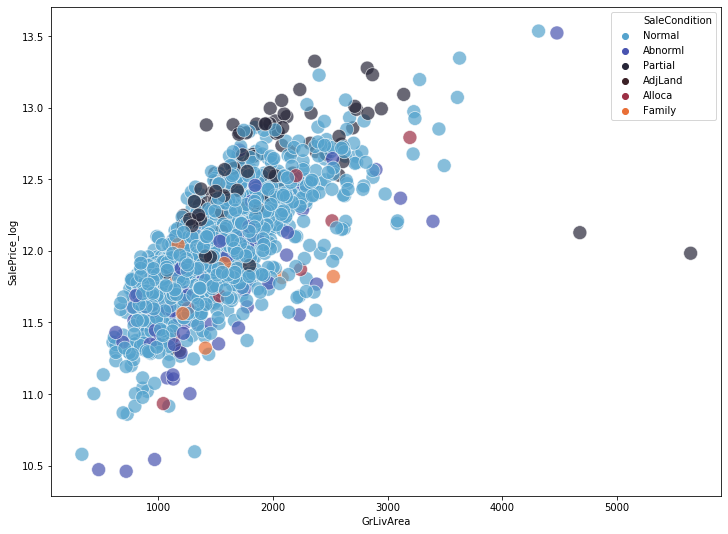

In [23]:
f, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice_log, hue=df.SaleCondition, 
                s=195, alpha=0.7, palette='icefire')

Partial sales looking like outliers on the far RHS. 

In [24]:
df[df["SaleCondition"]=="Partial"].shape

(125, 82)

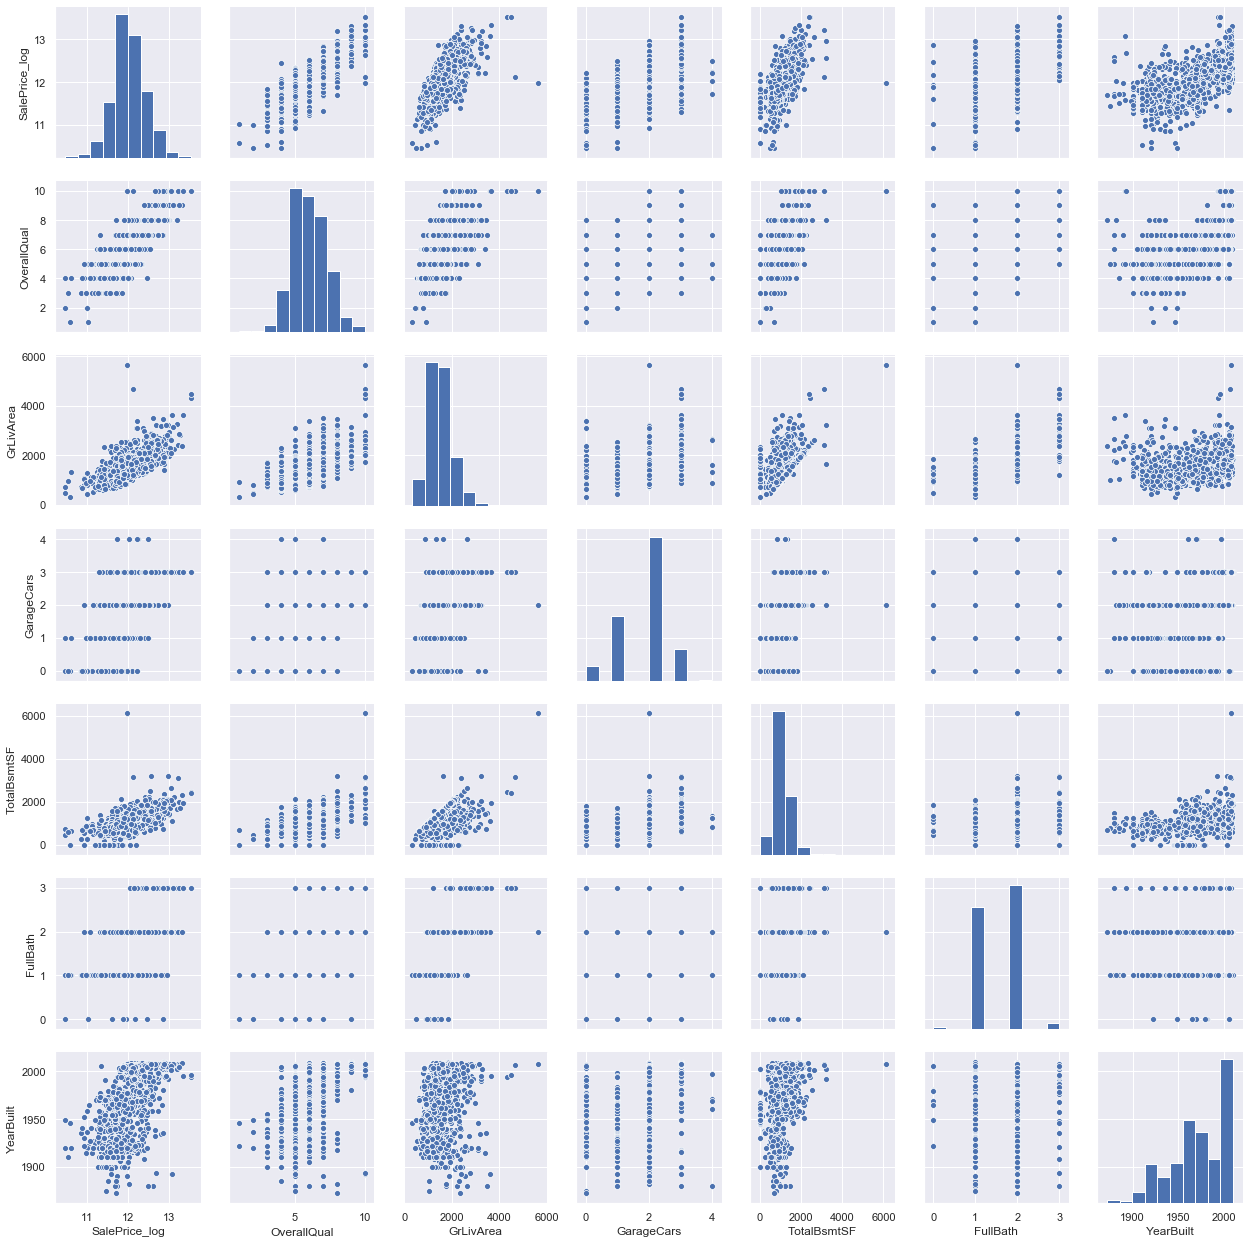

In [25]:
sns.set()
best_correlated_cols = [
    'SalePrice_log', 'OverallQual', 
    'GrLivArea', 'GarageCars', 
    'TotalBsmtSF', 'FullBath', 'YearBuilt'
]
sns.pairplot(df[best_correlated_cols], size = 2.5)

In fact, a better way to represent this information would be to first label encode the categorical variables and then plot then. 

### Dealing with Missing Data

Normally we would simply delete either the row or column depending on the extent of corruption, but this time we look at it a little more closely. 

In particular, null values in features like `PoolQC` could imply that there is no pool. 

Alternatively, we could consider the correlation between the variables and drop the variables that are highly correlated with many missing values.

Both I would are valid approaches, and depends on the nature of the data and the end goal. 

If you were aiming for pure prediction accuracy, then it makes sense to try both approaches. For explainability, you could keep certain variables if they provide intuitive explanation for your model results. 

In [26]:
# for col in df.columns:
#     print("{} has \n{} null values\n---\n".format(col, df[col].isnull().value_counts()))
    
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.sort_values(by=["Total"], ascending=False).head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


- null values in categorical variables are imputed to `None`.

- continuous variables are imputed to the median. 

- dealing with `LotFrontage` will be interesting, as it is hugely categorical with almost 20% missing values

In [27]:
categorical_missing_none = [
    'PoolQC', 'MiscFeature', 'Alley', 
    'Fence', 'FireplaceQu', 'GarageType', 
    'GarageCond', 'GarageFinish', 'GarageQual',
    'BsmtFinType2', 'BsmtExposure', 'BsmtQual',
    'BsmtCond', 'BsmtFinType1', 'MasVnrType'
]

for col in categorical_missing_none:
    df[col].fillna('None', inplace=True)

df[categorical_missing_none].head()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageType,GarageCond,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrType
0,None,None,None,None,None,Attchd,TA,RFn,TA,Unf,No,Gd,TA,GLQ,BrkFace
1,None,None,None,None,TA,Attchd,TA,RFn,TA,Unf,Gd,Gd,TA,ALQ,None
2,None,None,None,None,TA,Attchd,TA,RFn,TA,Unf,Mn,Gd,TA,GLQ,BrkFace
3,None,None,None,None,Gd,Detchd,TA,Unf,TA,Unf,No,TA,Gd,ALQ,None
4,None,None,None,None,TA,Attchd,TA,RFn,TA,Unf,Av,Gd,TA,GLQ,BrkFace


In [28]:
categorical_missing = [
    'Electrical', 'MSZoning', 'Utilities',
    'Exterior1st','Exterior2nd', 'KitchenQual',
    'Functional', 'SaleType'
]

for col in categorical_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)

df[categorical_missing].head()

,Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType
0,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD
1,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD
2,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD
3,SBrkr,RL,AllPub,Wd Sdng,Wd Shng,Gd,Typ,WD
4,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD


In [29]:
continuous_missing = [
    'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 
    'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
    'GarageArea'
]

for col in continuous_missing:
    df[col].fillna(df[col].median(), inplace=True)
    
df[continuous_missing].head()

,BsmtFullBath,BsmtHalfBath,GarageCars,MasVnrArea,GarageYrBlt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea
0,1,0,2,196.0,2003.0,706,0,150,856,548
1,0,1,2,0.0,1976.0,978,0,284,1262,460
2,1,0,2,162.0,2001.0,486,0,434,920,608
3,1,0,3,0.0,1998.0,216,0,540,756,642
4,1,0,3,350.0,2000.0,655,0,490,1145,836


In [30]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
SalePrice_log,0,0.000000
BsmtQual,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [31]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [32]:
labelencoded_categorical = df.select_dtypes(include = ['object']).agg(LabelEncoder().fit_transform)
labelencoded_categorical["LotFrontage"] = df["LotFrontage"]

corr_labelencoded = labelencoded_categorical.corr()
corr_labelencoded.sort_values('LotFrontage')['LotFrontage']

BldgType        -0.448537
GarageType      -0.276750
LotConfig       -0.208276
KitchenQual     -0.200636
ExterQual       -0.197128
PoolQC          -0.195051
GarageFinish    -0.171654
LotShape        -0.169641
BsmtQual        -0.149831
BsmtExposure    -0.138181
MSZoning        -0.111690
HeatingQC       -0.088687
LandContour     -0.080757
Alley           -0.066880
Street          -0.040886
Fence           -0.040862
SaleType        -0.034559
BsmtFinType1    -0.025419
Heating         -0.022782
MasVnrType      -0.022444
BsmtFinType2    -0.019426
FireplaceQu     -0.019041
Condition1      -0.009254
Condition2       0.003722
MiscFeature      0.010689
Functional       0.033071
HouseStyle       0.035502
ExterCond        0.052944
BsmtCond         0.059373
SaleCondition    0.063372
Electrical       0.065008
CentralAir       0.071659
Exterior1st      0.081271
LandSlope        0.088345
Neighborhood     0.093003
PavedDrive       0.094467
RoofMatl         0.095785
GarageCond       0.097482
GarageQual  

We will use `BldgType`.

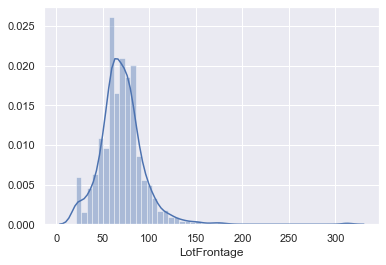

In [33]:
sns.distplot(df[df["LotFrontage"].notnull()]["LotFrontage"])

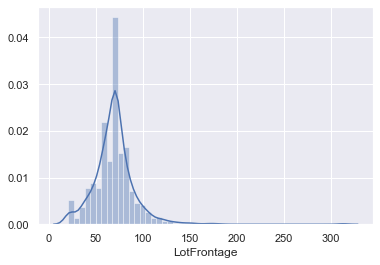

In [34]:
df["LotFrontage"] = df.groupby(['BldgType'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))
sns.distplot(df["LotFrontage"])

__Now we will visualise the bivariate relationships again, but this time with the missing data taken care of.__

In [28]:
df_corr = df.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()
df_corr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
Id,1.000000,0.018745,-0.006096,-0.029297,-0.004765,0.008916,-0.002855,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.011313,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.051971,-0.047434,0.001689,0.029826,0.008514,0.047668,0.007223,-0.024332,0.016616,-0.010055,0.045877,-0.006960,-0.009056,-0.031807,0.042120,0.002157,0.009821,0.037632,-0.000570,0.002483,-0.044849,0.002095,0.002289,-0.020155,0.005587,0.006784,0.038089,0.002951,-0.004432,0.027383,-0.001064,-0.019772,0.003765,-0.007822,-0.000959,-0.004626,0.016570,0.010518,0.001955,-0.008379,0.005971,-0.031389,-0.008747,0.007487,-0.041828,-0.003816,0.056909,-0.033928,-0.000399,-0.038103,-0.008427,0.021172,0.000712,0.019773,-0.005806,-0.022573,-0.022573
MSSubClass,0.018745,1.000000,0.037785,-0.377273,-0.298528,-0.025737,0.073545,0.090920,-0.007658,-0.026217,0.060625,-0.029300,-0.008765,-0.023826,-0.026699,0.712474,0.446294,0.056546,-0.060795,0.041336,0.039944,-0.131687,-0.021525,-0.081155,-0.121192,-0.048055,0.028631,-0.019969,0.007819,0.072182,-0.090427,-0.028777,-0.084258,0.022715,-0.072985,0.033923,-0.074354,-0.135334,-0.262705,0.062597,0.021791,-0.096907,0.056742,-0.229439,0.305202,0.052697,0.137979,0.001790,0.013119,0.166707,0.208262,0.024467,0.323390,0.008222,0.106714,0.020999,-0.019405,0.062303,0.119090,0.086418,-0.040774,-0.009126,-0.068665,-0.031166,-0.038656,-0.048433,-0.015481,0.000819,-0.005201,-0.047292,-0.017565,0.017759,-0.015024,0.074567,-0.045944,-0.012910,0.007052,-0.022100,0.020195,-0.033097,-0.040552,-0.040552
MSZoning,-0.006096,0.037785,1.000000,-0.110242,-0.080135,0.087654,-0.368086,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.306481,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.038909,0.200536,-0.096041,-0.235174,0.160778,-0.011450,0.038115,0.026347,-0.058023,-0.034004,0.032360,-0.039444,-0.100984,0.056866,0.134279,-0.049523,-0.070818,-0.060895,-0.079610,0.005452,-0.104200,-0.018526,0.007193,-0.198290,-0.133876,-0.015176,0.049434,0.128976,-0.042591,-0.095722,-0.011349,-0.002491,0.141142,-0.265035,0.117559,-0.157042,-0.195628,-0.162998,-0.102744,-0.100366,-0.015226,-0.166268,0.112593,-0.000527,0.014073,-0.002825,0.002882,-0.061289,-0.005553,0.018630,-0.031496,-0.020628,0.097437,0.009494,-0.231544,-0.231544
LotFrontage,-0.029297,-0.377273,-0.110242,1.000000,0.600544,-0.038114,-0.067922,-0.159844,-0.040171,0.002293,-0.189769,0.052859,0.096114,-0.003508,0.002641,-0.513813,0.045626,0.229199,-0.047123,0.109718,0.061163,0.174541,0.069712,0.063469,0.088977,-0.034306,0.188171,-0.167659,0.041970,0.087594,-0.121362,0.055643,-0.110144,-0.019223,0.136037,-0.024579,0.052214,0.129020,0.336358,-0.026391,-0.057128,0.071041,0.058691,0.378230,0.141722,0.036301,0.339470,0.067321,0.000543,0.186745,0.060358,0.283677,-0.000190,-0.176076,0.349857,0.026540,0.232161,-0.008159,-0.269463,0.049252,-0.146717,0.285541,0.339722,0.096038,0.092257,0.094596,0.100086,0.144336,0.003960,0.071750,0.054709,0.068392,-0.129871,-0.058368,0.017251,0.008572,0.018360,0.007549,-0.033770,0.0581

In [35]:
corr_positive = df_corr.loc[:, ['SalePrice', 'OverallQual', 
                                'GrLivArea', 'GarageCars', 
                                'GarageArea', 'TotalBsmtSF']
                           ]
g = sns.pairplot(corr_positive, kind = 'reg', 
                 diag_kind = 'kde', 
                 plot_kws = {'line_kws':{'color':'green', 'alpha': 0.7}}) 

NameError: name 'df_corr' is not defined

In [ ]:
corr_neg = df_corr.loc[:, ['SalePrice', 'ExterQual', 
                           'BsmtQual', 'KitchenQual', 
                           'GarageType', 'GarageFinish']
                      ]
g = sns.pairplot(corr_neg, kind = 'reg', 
                 diag_kind = 'kde',
                 plot_kws = {'line_kws':{'color':'red'}})

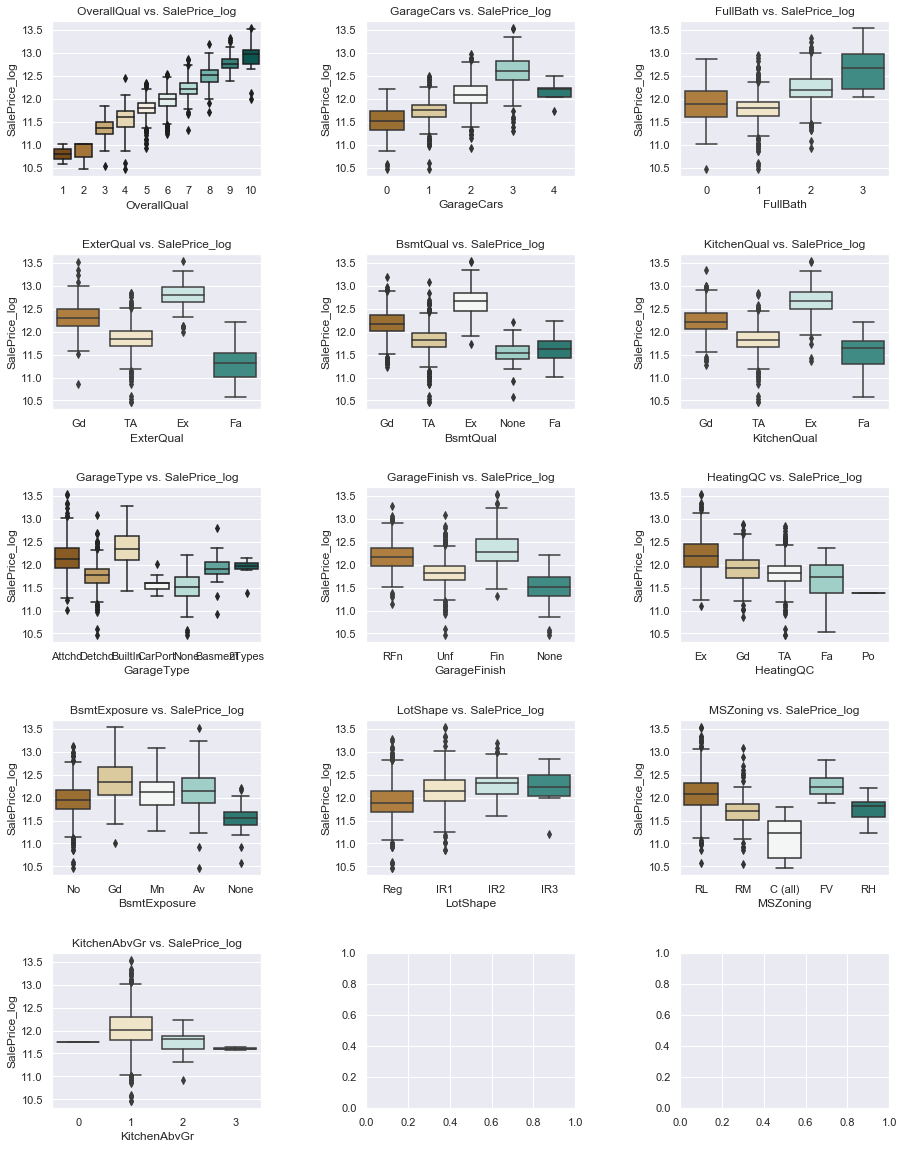

In [40]:
num_cols = 3

fig, axes = plt.subplots(5, num_cols)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

categorical_boxplots = [
    'OverallQual', 'GarageCars', 'FullBath',
    'ExterQual', 'BsmtQual', 'KitchenQual', 
    'GarageType', 'GarageFinish', 'HeatingQC', 
    'BsmtExposure', 'LotShape', 'MSZoning', 
    'KitchenAbvGr'
]

i = j = 0;

for col in categorical_boxplots:
    if j // num_cols > i:
        i += 1
    sns.boxplot(x = col, y = "SalePrice_log", 
                palette = "BrBG", data = df, 
                ax=axes[i, j % num_cols]).set(
                                        xlabel=col,
                                        ylabel="SalePrice_log",
                                        title="{} vs. SalePrice_log".format(col)
                                    )
    j += 1
plt.show()

### Distribution and Skewness



In [41]:
skewness = pd.Series(df.select_dtypes(include = ['int64', 'float64']).skew()).sort_values(ascending=False)
skewness.head()

MiscVal         24.476794
PoolArea        14.828374
LotArea         12.207688
3SsnPorch       10.304342
LowQualFinSF     9.011341
dtype: float64

In [42]:
skewness.index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'HalfBath',
       'Fireplaces', 'BsmtFullBath', 'BedroomAbvGr', 'GarageArea',
       'SalePrice_log', 'FullBath', 'Id', 'GarageCars', 'YearRemodAdd',
       'YearBuilt', 'GarageYrBlt'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

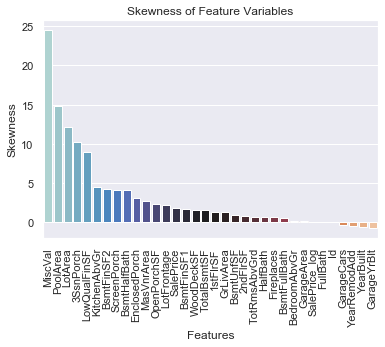

In [43]:
sns.barplot(skewness.index, skewness.values, palette="icefire").set(
    title="Skewness of Feature Variables",
    xlabel="Features",
    ylabel="Skewness",
)
plt.xticks(rotation='90')

We transform any variable that skewness greater than 0.8.

In [44]:
skewness[skewness.values > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
OpenPorchSF       2.364342
LotFrontage       2.266565
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

In [45]:
col_to_log = df[skewness[skewness.values > 0.8].index].columns
col_to_log

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')

In [46]:
# np.log1p := log(x+1)
df[col_to_log] = df[col_to_log].apply(np.log1p)
df[col_to_log]

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,MasVnrArea,OpenPorchSF,LotFrontage,SalePrice,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtUnfSF,2ndFlrSF
0,0.000000,0.0,9.042040,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,5.283204,4.127134,4.189655,12.247699,6.561031,0.000000,6.753438,6.753438,7.444833,5.017280,6.751101
1,0.000000,0.0,9.169623,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,4.394449,12.109016,6.886532,5.700444,7.141245,7.141245,7.141245,5.652489,0.000000
2,0.000000,0.0,9.328212,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,5.093750,3.761200,4.234107,12.317171,6.188264,0.000000,6.825460,6.825460,7.488294,6.075346,6.765039
3,0.000000,0.0,9.164401,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,5.609472,0.000000,3.583519,4.110874,11.849405,5.379897,0.000000,6.629363,6.869014,7.448916,6.293419,6.629363
4,0.000000,0.0,9.565284,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,5.860786,4.442651,4.442651,12.429220,6.486161,5.262690,7.044033,7.044033,7.695758,6.196444,6.960348
5,6.552508,0.0,9.555064,5.771441,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,3.433987,4.454347,11.870607,6.597146,3.713572,6.680855,6.680855,7.217443,4.174387,6.340359
6,0.000000,0.0,9.218804,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,5.231109,4.060443,4.330733,12.634606,7.222566,5.545177,7.430707,7.435438,7.435438,5.762051,0.000000
7,5.860786,0.0,9.247925,0.000000,0.000000,0.693147,3.496508,0.000000,0.000000,5.433722,5.484797,5.323010,4.276666,12.206078,6.756932,5.463832,7.010312,7.010312,7.645398,5.379897,6.891626
8,0.000000,0.0,8.719481,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,5.327876,0.000000,0.000000,3.951244,11.774528,0.000000,4.510860,6.859615,6.930495,7.481556,6.859615,6.624065
9,0.000000,0.0,8.912069,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,3.931826,11.678448,6.747587,0.000000,6.899723,6.982863,6.982863,4.948760,0.000000


### Save the Dataset

In [50]:
df.to_csv("{}/{}_wrangled.csv".format(data_path, file), index=False)

In [54]:
df.shape

(1460, 81)